In [1]:
# All imports required
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math
from tqdm import tqdm
import requests
import random

In [2]:
# All defined functions
import requests
from PIL import Image

# Function to load the online image.
def load_image(name, no_alpha=True):
    url = f'https://cloud.dfki.de/owncloud/index.php/s/THLirfoB6SYTetn/download?path=&files={name}'
    image = np.asarray(Image.open(requests.get(url, stream=True).raw))
    if no_alpha and len(image) > 2 and image.shape[2] == 4:
        image = image[:,:,:3]
    return image[:,:,::-1].copy()

# Function for resizing the image
def resize(image, scale):
    return cv2.resize(image, (int(image.shape[1]*scale), int(image.shape[0]*scale)))

# Function to print images size-by-size
def show(*images, titles=None, figsize=None):
    ROWS, COLS = 1, len(images)
    if figsize is not None:
        plt.figure(figsize=(18,6))
    for i, img in enumerate(images):
        plt.subplot(ROWS, COLS, i+1)
        if titles is not None:
            plt.title(titles[i])
        if len(img.shape) == 3:
            plt.imshow(img[:,:,::-1])
        else:
            plt.imshow(img)
    plt.show()

# Function to convert the image into grayscale    
def gray(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Function for Finding the point at which the template matches
def argmax_2d(image):
    return np.unravel_index(np.argmax(image), image.shape)

# Function for applying gaussian kernel
def sample_gaussian(mu, sigma):
    return np.random.normal(mu, sigma, 1)[0]

# Function for squaring each element of a matrix 
def elementwise_square(matrix):
    new_matrix=np.zeros_like(matrix)                        # Creating a output matrix of the same size as the input matrix but with 0 value
    # Loop for performing square of each element in the matrix
    for i in range(matrix.shape[0]):
        for j in range (matrix.shape[1]):
            new_matrix[i,j]=matrix[i,j]**2

    return new_matrix

# Function for summing all the elements of a matrix
def sum_of_elements_matrix(buffer):
    buffer_value=0                                          # Initialising the buffer value
    # Loop for adding all the values in a the input matrix
    for i in range (buffer.shape[0]):
        for j in range (buffer.shape[1]):
            buffer_value=buffer_value+buffer[i,j]          

    return buffer_value

# Function for performing multiplying each element of 2 matrices
def elementwise_multiplication(image_patch,kernel,image_patch_mean,kernel_mean):
    buffer=np.zeros_like(image_patch)                       # Creating a output matrix of the same size as the input matrix but with 0 value
    # Loop to perform the elementwise matrix multiplication
    for i in range (image_patch.shape[0]):
        for j in range (image_patch.shape[1]):
            buffer[i,j]=(image_patch[i,j]-image_patch_mean)*(kernel[i,j]-kernel_mean)
            
    return sum_of_elements_matrix(buffer)

### Histogram Equalisation

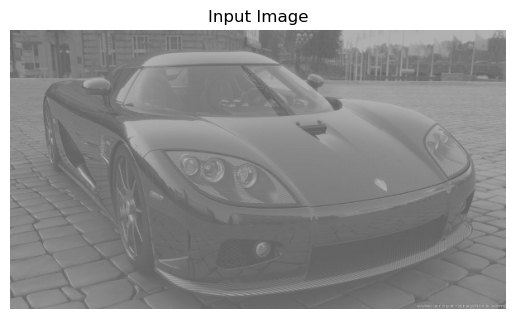

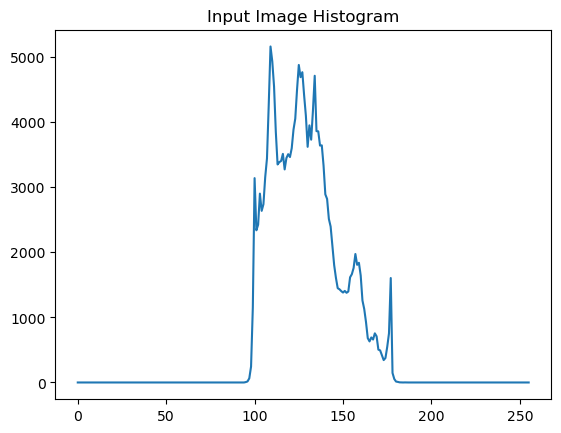

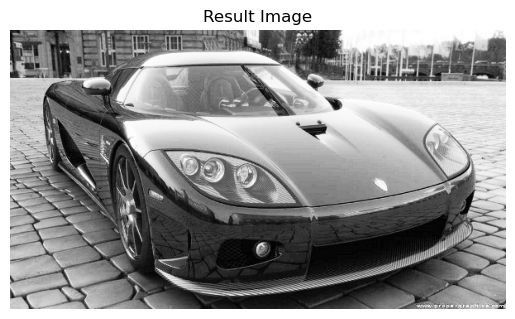

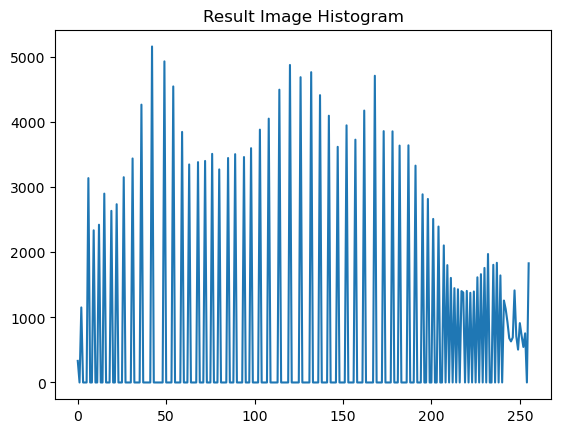

In [3]:
input_image_1 = cv2.imread(".//data//Task_01.png")                                          # Accesing Input Image 1
input_image_1_color_correction=cv2.cvtColor(input_image_1,cv2.COLOR_BGR2RGB)                # Converting Input Image color scheme from BGR to RGB because matplotlib.pyplot can display images only in RGB format
plt.title('Input Image')                                                
plt.axis('off')
plt.imshow(input_image_1_color_correction)                                                  # Show input image
plt.show()

# Calculating & displaying the histogram of the Input Image
hist=cv2.calcHist([input_image_1],[0],None,[256],[0,256])                                   # Calculating the histogram
plt.title('Input Image Histogram')                                                      
plt.plot(hist)                                                                              # Show histogram of input image
plt.show()

# Equalising the input image's histogram
img = cv2.cvtColor(input_image_1,cv2.COLOR_BGR2GRAY)                                        # Converting the image to Gray scale
equ = cv2.equalizeHist(img)                                                                 # Equalising Histogram
res = cv2.cvtColor(equ,cv2.COLOR_GRAY2RGB)                                                  # Converting Result Image color scheme from Gray Scale to RGB because matplotlib.pyplot can display images only in RGB format
plt.title('Result Image')
plt.axis("off")
plt.imshow(res)                                                                             # Show result image
plt.show()

# Calculating & Displaying the histogram of the Resul Image
hist=cv2.calcHist([equ],[0],None,[256],[0,256])                                             # Calculating the histogram
plt.title('Result Image Histogram')
plt.plot(hist)                                                                              # Show histogram of input image
plt.show()

### Image Filtering 
Comparing different types of Filtering processes

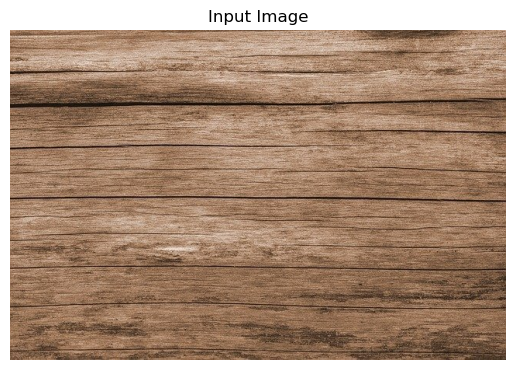

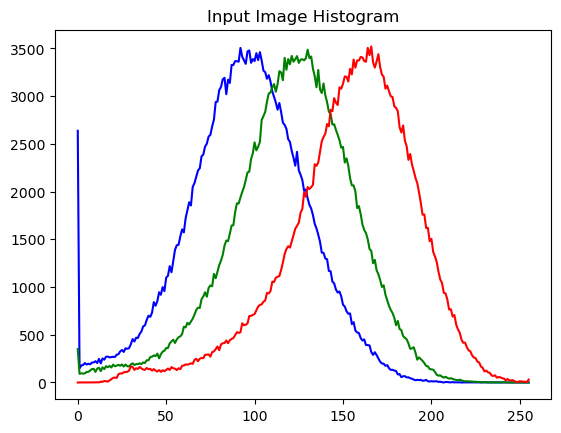

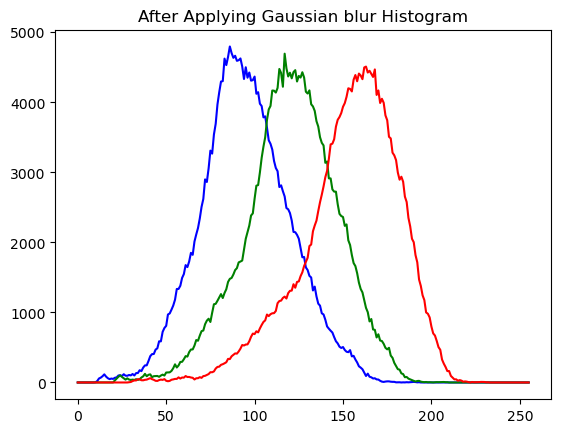

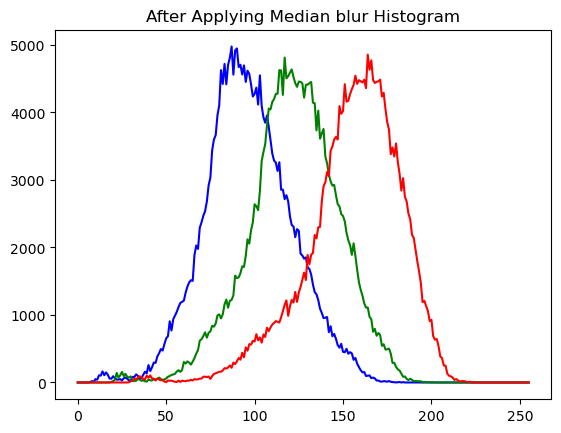

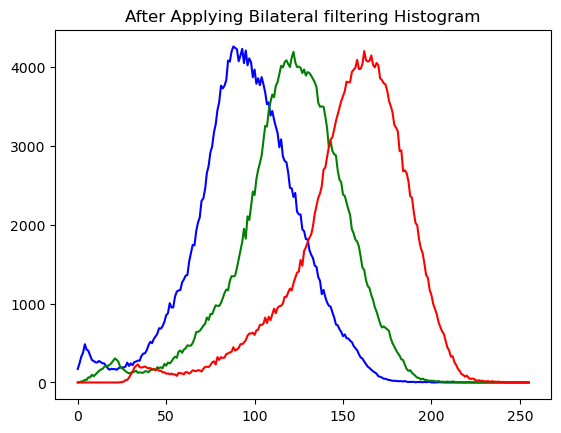

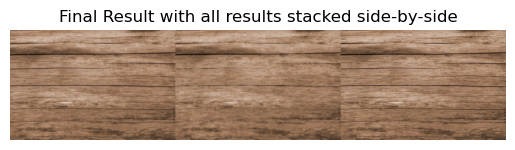

In [4]:
input_image_2 = cv2.imread(".//data//Task_02.png")                                          # Accesing Input Image 2
input_image_2_color_correction=cv2.cvtColor(input_image_2,cv2.COLOR_BGR2RGB)                # Converting Input Image color scheme from BGR to RGB because matplotlib.pyplot can display images only in RGB format
plt.title('Input Image')
plt.axis('off')
plt.imshow(input_image_2_color_correction)                                                  # Show input image
plt.show()

# Input image has RGB channels hence we declare a variable that takes into account the RGB values
color=('b','g','r')                                                                         # Creates a tuple of blue, green and red 

# Calculating & displaying the histogram for Input image
for i, col in enumerate(color):
    hist=cv2.calcHist([input_image_2],[i],None,[256],[0,256])                               # Calculating the histogram
    plt.title('Input Image Histogram')
    plt.plot(hist,color=col)
plt.show()                                                                                  # Show histogram of input image

# Applying Gaussian Blur to the input image
Gaussian_blur=cv2.GaussianBlur(input_image_2,(5,5),0)                                       # Calculating Gaussian Blur
Gaussian_blur_color_correction=cv2.cvtColor(Gaussian_blur,cv2.COLOR_BGR2RGB)                # Converting Gaussian Blur Image color scheme from BGR to RGB because matplotlib.pyplot can display images only in RGB format

# Calculating & displaying the histogram for Gaussian Blur image
for i, col in enumerate(color):
    hist=cv2.calcHist([Gaussian_blur],[i],None,[256],[0,256])                               # Calculating the histogram
    plt.title('After Applying Gaussian blur Histogram')                             
    plt.plot(hist,color=col)
plt.show()                                                                                  # Show histogram of Gaussian Blur image

# Applying Median Blur to the input image
Median_blur=cv2.medianBlur(input_image_2,5)                                                 # Calculating Median Blur     
Median_blur_color_correction=cv2.cvtColor(Median_blur,cv2.COLOR_BGR2RGB)                    # Converting Median Blur Image color scheme from BGR to RGB because matplotlib.pyplot can display images only in RGB format

# Calculating & displaying the histogram for Median Blur image
for i, col in enumerate(color):
    hist=cv2.calcHist([Median_blur],[i],None,[256],[0,256])                                 # Calculating the histogram
    plt.title('After Applying Median blur Histogram')
    plt.plot(hist,color=col)
plt.show()                                                                                  # Show histogram of Median Blur image

# Applying Bilateral Filtering to the input image
Bilateral_filtering=cv2.bilateralFilter(input_image_2,5,75,75)                              # Calculating Bilateral Filtering 
Bilateral_filtering_color_correction=cv2.cvtColor(Bilateral_filtering,cv2.COLOR_BGR2RGB)    # Converting Bilateral Filtering Image color scheme from BGR to RGB because matplotlib.pyplot can display images only in RGB format

# Calculating & displaying the histogram for Bilateral Filtering image
for i, col in enumerate(color):
    hist=cv2.calcHist([Bilateral_filtering],[i],None,[256],[0,256])                         # Calculating the histogram
    plt.title('After Applying Bilateral filtering Histogram')
    plt.plot(hist,color=col)
plt.show()                                                                                  # Show histogram of Bilateral Filtering image

res = np.hstack((Gaussian_blur_color_correction,Median_blur_color_correction))              # Stacking Gaussian Blur and Median Blur images horizontally
final_result=np.hstack((res,Bilateral_filtering_color_correction))                          # Stacking the above image with Bilateral Filtering

plt.title('Final Result with all results stacked side-by-side')
plt.axis("off")
plt.imshow(final_result)                                                                    # Displaying the final result i.e. all 3 images stacked horizontally
plt.show()

### Morphological Opertions
Performing various Morphological Operations on an Image

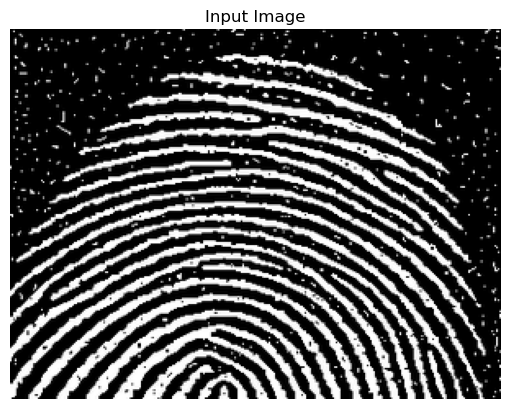

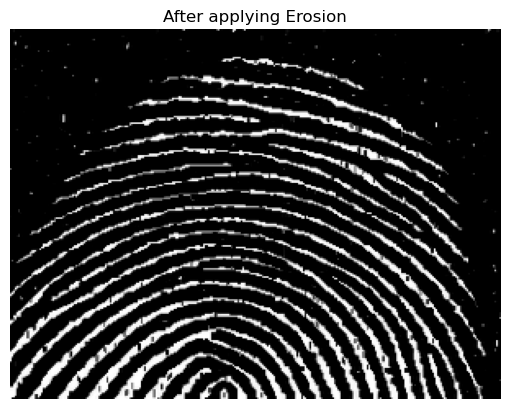

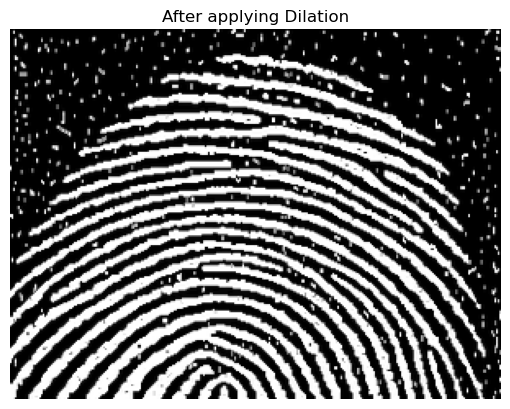

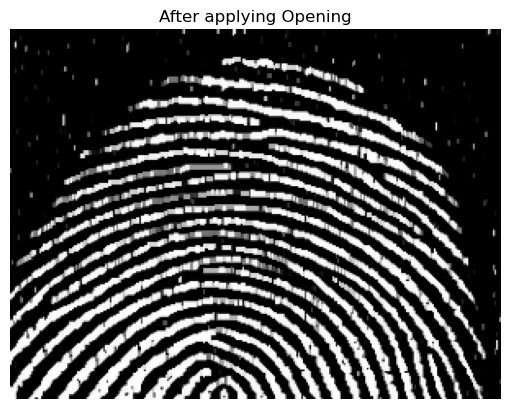

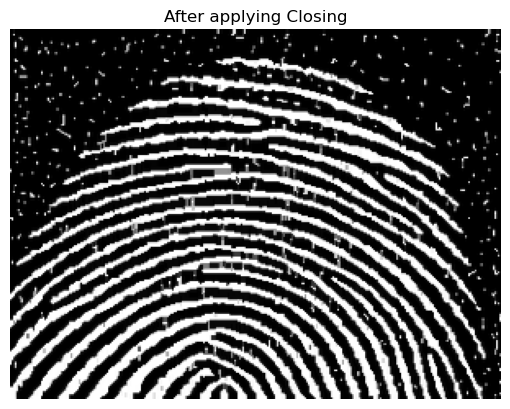

In [5]:
input_image_4 = cv2.imread(".//data//Task_04.png")                                          # Accesing Input Image 4
plt.title('Input Image')
plt.axis('off')
plt.imshow(input_image_4)                                                                   # Displaying the Input Image
plt.show()

# Applying & Displaying Erosion on Input Image              
erosion=cv2.erode(input_image_4,(1,1),iterations=2)                                         # Calculating erosion                                 
plt.title('After applying Erosion')
plt.axis('off')
plt.imshow(erosion)                                                                         # Displaying the Erosion Image
plt.show()

# Applying & Displaying Dilation on Input Image
dilation=cv2.dilate(input_image_4,(3,3))                                                    # Calculating dilation 
plt.title('After applying Dilation')
plt.axis('off')
plt.imshow(dilation)                                                                        # Displaying the Dilation Image
plt.show()

# Applying & Displaying Opening on Input Image
opening=cv2.morphologyEx(input_image_4,cv2.MORPH_OPEN,(1,1),iterations=2)                   # Calculating opening 
plt.title('After applying Opening')
plt.axis('off')
plt.imshow(opening)                                                                         # Displaying the Opening Image
plt.show()

# Applying & Displaying Closing on Input Image
closing=cv2.morphologyEx(input_image_4,cv2.MORPH_CLOSE,(1,1),iterations=2)                  # Calculating closing
plt.title('After applying Closing')
plt.axis('off')
plt.imshow(closing)                                                                         # Displaying the Closing Image
plt.show()

<p style="page-break-after:always;"></p>

# Noise
---

In image processing there is different types of noise.

<br>
<div style="background-color: #042c58; color: #ffffff; width: 100%; padding: 0.3em; font-size:1.1em; font-weight: bold;">Image Noise</div>
<div style="background-color: #d7e9fd; width: 100%; padding-top: 0.5em; padding-bottom: 0.3em">
    
* **Salt and Pepper**: Single Pixels that are white or black.
* **Impulse**: Single Pixels that are white.
* **Gaussian**: Intensity of pixel distributed by a gaussian around the true value.

</div>

**TASK**:
Applying the different types of Noise stated above.

**Salt & Pepper Noise**: 
Considering the Probability = 0.1 and applying a Salt and Pepper Noise on an Image


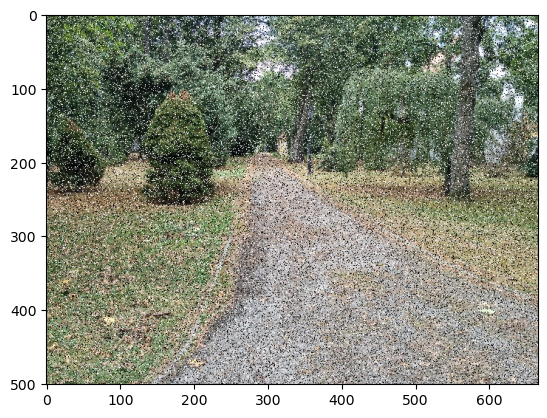

In [6]:
# Salt and Pepper
I = load_image("park.png")

def salt_and_pepper_noise(I, PROBABILITY = 0.1):
    # TODO
    I_gray=gray(I)                                                                      # Converting to gray scale
    random_values=[random.random() for _ in range (I_gray.shape[0]*I_gray.shape[1])]    # Generating random values for the salt and pepper mask
    salt_pepper_mask=np.array(random_values).reshape(I_gray.shape[0],I_gray.shape[1])   # Reshaping the list of random variables to a matrix

    # Loop to apply the salt and pepper noise
    for i in range (I_gray.shape[0]):
        for j in range (I_gray.shape[1]):
            if salt_pepper_mask[i,j]<PROBABILITY:                                               # Condition for Probability = 0.1
                I[i,j]=0
            elif PROBABILITY<=salt_pepper_mask[i,j]<0.2:
                I[i,j]=255
    
    return I

show(salt_and_pepper_noise(I))

**Impulse Noise**: Considering the Probability = 0.1 and applying an Impulse Noise on an Image

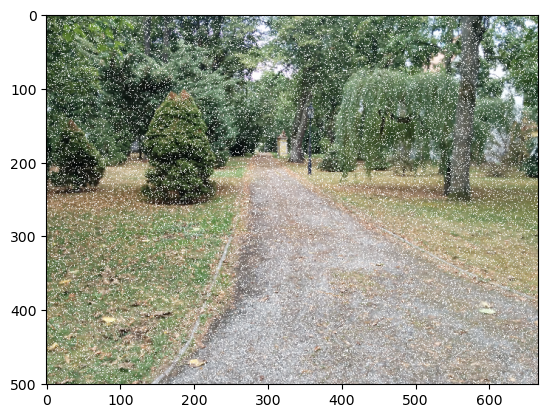

In [7]:
# Impulse Noise
I = load_image("park.png")

def impulse_noise(I, PROBABILITY = 0.1):
    # TODO
    I_gray=gray(I)                                                                      # Converting to gray scale
    random_values=[random.random() for _ in range (I_gray.shape[0]*I_gray.shape[1])]    # Generating only Impulse noise
    salt_pepper_mask=np.array(random_values).reshape(I_gray.shape[0],I_gray.shape[1])   # Reshaping the list of random variables to a matrix

    # Loop to apply the impulse noise
    for i in range (I_gray.shape[0]):
        for j in range (I_gray.shape[1]):
            if salt_pepper_mask[i,j]<PROBABILITY:                                               # Condition for Probability = 0.1
                I[i,j]=255
    return I

show(impulse_noise(I))

**Gaussian Noise**:
Considering 
1) Probability = 0.5
2) Sigma = 200

Applying a Gaussian Noise on an Image

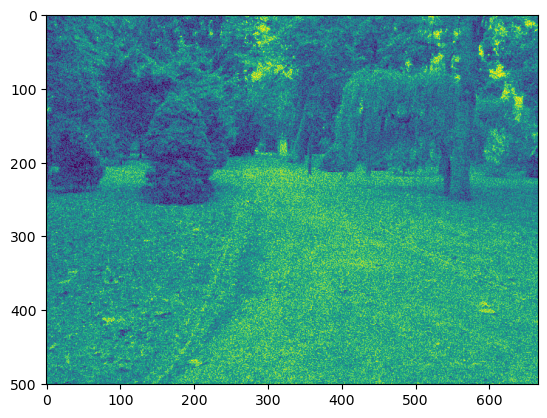

In [8]:
# Gaussian Noise
I = load_image("park.png")

def gaussian_noise(I, PROBABILITY = 0.5, SIGMA = 200):
    # TODO
    I_gray=gray(I)                                                                      # Converting image to grayscale
    random_values=[random.random() for _ in range (I_gray.shape[0]*I_gray.shape[1])]    # Generating random values for gaussian noise
    gaussian_mask=np.array(random_values).reshape(I_gray.shape[0],I_gray.shape[1])      # Reshaping the list to a matrix
    noise=sample_gaussian(0,SIGMA)                                                      # Using sample gaussian function to generate a noise                                             
    
    # Looping to apply the gaussian mask on the image
    for i in range (gaussian_mask.shape[0]):                                            
        for j in range (gaussian_mask.shape[1]):
            if gaussian_mask[i,j]<PROBABILITY:                                          # Condition to apply probability
                gaussian_mask[i,j]=0
            elif gaussian_mask[i,j]>=PROBABILITY:
                gaussian_mask[i,j]=1
   
    noise=noise*gaussian_mask
    I=I_gray+noise
    return I

show(gaussian_noise(I))

<p style="page-break-after:always;"></p>

# Convolution
---

For filtering we want to use convolution to apply our kernel to the entire image.

<br>
<div style="background-color: #042c58; color: #ffffff; width: 100%; padding: 0.3em; font-size:1.1em; font-weight: bold;">Convolution (theoretically)</div>
<div style="background-color: #d7e9fd; width: 100%; padding-top: 0.5em; padding-bottom: 0.3em">
    
<center>Given a kernel $K$ and an image $F$, the convolution is defined as:</center>


$$ G(u,v) = \sum_{i} \sum_{j} K(i,j) F(u-i, v-j)$$

</div>


100%|██████████| 75/75 [00:00<00:00, 87.12it/s]


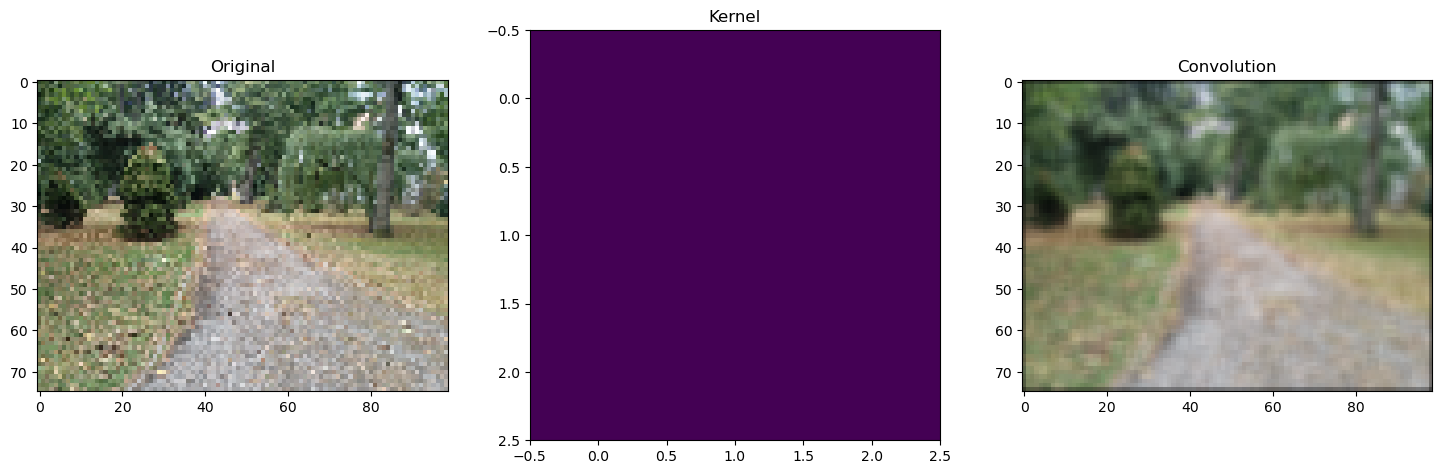

In [9]:
# Convolution
I = resize(load_image("park.png"), 0.15)
K = np.array([[1, 1, 1],[1, 1, 1],[1, 1, 1]], dtype=np.float32) / 9.0
def convolution(I, K):
    # TODO
    I=I.astype(np.float32)                                                                                                          # Converting image matrix into float
    # Splliting the image into R,G,B channels
    I_red=I[:,:,0]
    I_green=I[:,:,1]
    I_blue=I[:,:,2]
    # Adding padding to every channel
    padded_img_red = np.pad(I_red, ((K.shape[0] // 2, K.shape[0] // 2), (K.shape[1] // 2, K.shape[1] // 2)), mode='constant')
    padded_img_green = np.pad(I_green, ((K.shape[0] // 2, K.shape[0] // 2), (K.shape[1] // 2, K.shape[1] // 2)), mode='constant')
    padded_img_blue = np.pad(I_blue, ((K.shape[0] // 2, K.shape[0] // 2), (K.shape[1] // 2, K.shape[1] // 2)), mode='constant')
    # Creating separate output matrices for each channel
    G_red=np.zeros_like(I_red)
    G_green=np.zeros_like(I_green)
    G_blue=np.zeros_like(I_blue)

    for i in tqdm(range(I.shape[0])):
        for j in range(I.shape[1]):
            # Creating patches from image equal to the size of the kernel for every channel
            image_patch_red=padded_img_red[i:i+K.shape[0],j:j+K.shape[1]]
            image_patch_green=padded_img_green[i:i+K.shape[0],j:j+K.shape[1]]
            image_patch_blue=padded_img_blue[i:i+K.shape[0],j:j+K.shape[1]]
            # Calling the function elementwise multiplication to perform multiplication between every element between the image patch and kernel for every channel
            G_red[i,j]=elementwise_multiplication(image_patch_red,K,0,0)
            G_green[i,j]=elementwise_multiplication(image_patch_green,K,0,0)
            G_blue[i,j]=elementwise_multiplication(image_patch_blue,K,0,0)
    
    # Stacking the channel in order to make an RGB image
    H=np.dstack((G_red,G_green))
    H=np.dstack((H,G_blue))
    H=H.astype(np.uint8)                                                                # Converting the data type back to integer    
    
    return H
show(
    I, K, convolution(I, K),
    titles=["Original", "Kernel", "Convolution"],
    figsize=(18,6)  # Make a wide figure.
)

Implementing a gaussian filter for kernel size 9x9 with $\sigma=3$.

<div style="background-color: #042c58; color: #ffffff; width: 100%; padding: 0.3em; font-size:1.1em; font-weight: bold;">Gaussian Smoothing</div>
<div style="background-color: #d7e9fd; width: 100%; padding-top: 0.5em; padding-bottom: 0.3em">
    
<center>The value of the gaussian at x,y is $g(x,y).$</center>

$$ g(x,y) = \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{x^2+y^2}{2\sigma^2}}$$
    
</div>


100%|██████████| 75/75 [00:04<00:00, 18.38it/s]


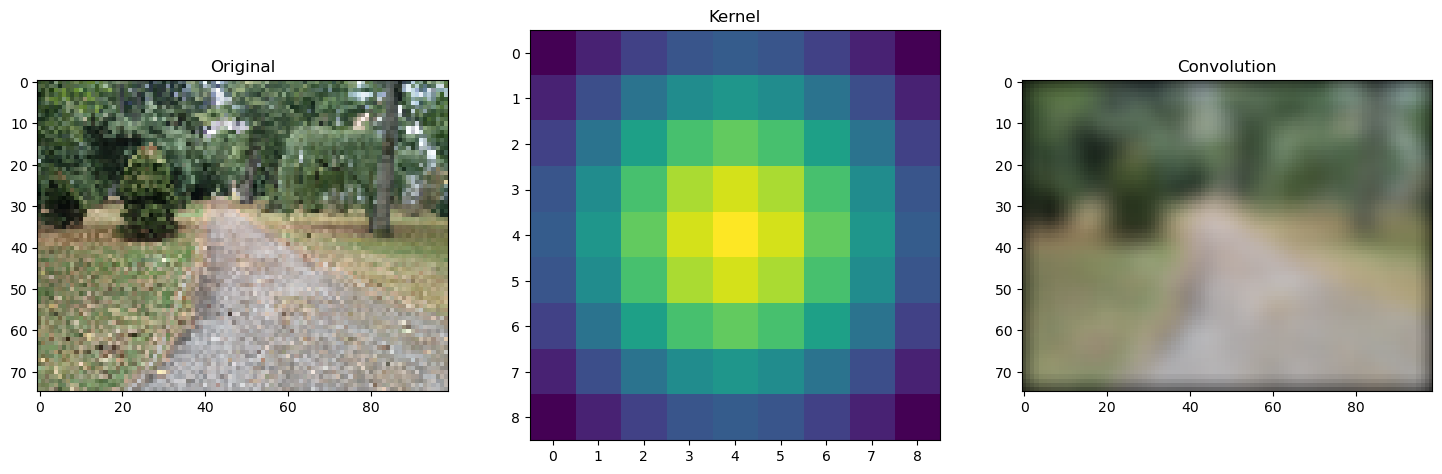

In [10]:
# Gaussian Smoothing
I = resize(load_image("park.png"), 0.15)

def gaussian_kernel(n, sigma):
    # TODO
    K=np.zeros((n,n))                                                           # Creating a kernel of zeros
    # Loop for creating the kernel
    for i in range (n//2-n+1,n-n//2):
        for j in range (n//2-n+1,n-n//2):
            # Creating and applying the formula for Gaussian Filter
            numerator=math.exp(-(i**2+j**2)/(2*(sigma**2)))
            denominator=math.sqrt(2*math.pi)*sigma
            K[i+n//2,j+n//2]=numerator/denominator
    # Normalising K matrix
    K=K/sum_of_elements_matrix(K)
    return K

K = gaussian_kernel(9, 3)
show(
    I, K, convolution(I, K),
    titles=["Original", "Kernel", "Convolution"],
    figsize=(18,6)  # Make a wide figure.
)